## **Task1.Set google colab runtime**

In [2]:
!pip install torch torchvision

In [3]:
!git clone https://github.com/parth1620/Project-NST.git

Cloning into 'Project-NST'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


## **Task 2: Loading VGG-19 pretrained model**

In [6]:
import torch
from torchvision import models

vgg=models.vgg19(pretrained=True)
print(vgg)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [7]:
#remove Sequential part
vgg=vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [8]:
#freez layer 
for parameters in vgg.parameters():
  parameters.requires_grad_(False)

In [9]:
device= torch.device('cuda' if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [10]:
#move model to GPU
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## **Task 3: Preprocess Image**

In [11]:
from PIL import Image
from torchvision import transforms as T 

def preprocess(img_path,max_size=500):

  image = Image.open(img_path).convert('RGB')

  if max(image.size)>max_size:
    size = max_size
  else:
    size=max(image.size)
  
  img_trasforms =T.Compose([
                            T.Resize(size),
                            T.ToTensor(),
                            T.Normalize(mean=[0.485,0.456,0.406],
                                        std=[0.229,0.224,0.225])
  ])
  image=img_trasforms(image)
  image= image.unsqueeze(0)

  return image


In [85]:
content_p=preprocess('/content/Project-NST/content11.jpg')
style_p=preprocess('/content/Project-NST/style12.jpg')
content_p=content_p.to(device)
style_p=style_p.to(device)
print('content shape',content_p.shape)
print('style shape',style_p.shape)

content shape torch.Size([1, 3, 259, 345])
style shape torch.Size([1, 3, 625, 500])


## **Task 4: Deprocess Image**

In [86]:
import numpy as np
import matplotlib.pyplot as plt

def deprocess(tensor):
  image=tensor.to('cpu').clone()
  image=image.numpy()
  image=image.squeeze(0)
  image=image.transpose(1,2,0)
  image=image*np.array([0.229,0.224,0.225])+np.array([0.485,0.456,0.406])
  image=image.clip(0,1)

  return image

In [87]:
content_d=deprocess(content_p)
style_d=deprocess(style_p)

print('content shape',content_d.shape)
print('style shape',style_d.shape)

content shape (259, 345, 3)
style shape (625, 500, 3)


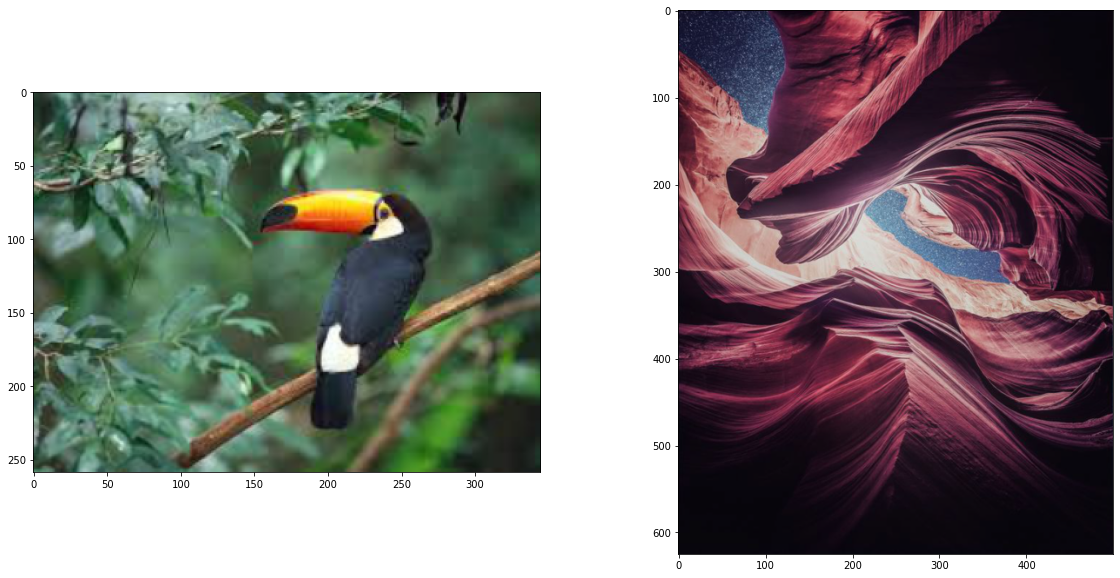

In [88]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
ax1.imshow(content_d)
ax2.imshow(style_d)

## **Task 5: Get content,style features and create gram matrix**

In [89]:
def get_features(image,model):
  layers={
      '0':'conv1_1',
      '5':'conv2_1',
      '10':'conv3_1',
      '19':'conv4_1',
      '21':'conv4_2',
      '28':'conv5_1'
  }
  x=image
  Features={}
  for name,layer in model._modules.items():
    x=layer(x)
    if name in layers:
      Features[layers[name]]=x
    return Features

In [90]:
content_f=get_features(content_p,vgg)
style_f=get_features(style_p,vgg)



In [91]:
def gram_matrix(tensor):
  b,c,h,w=tensor.size()
  tensor=tensor.view(c,h*w)
  gram=torch.mm(tensor,tensor.t())
  return gram

In [92]:
style_grams={layer : gram_matrix(style_f[layer]) for layer in style_f}

## Task 6: Create content and style **loss**

In [93]:
def content_loss(target_conv4_2,content_conv4_2):
  loss = torch.mean((target_conv4_2-content_conv4_2)**2)
  return loss

In [94]:
style_weights={
    'conv1_1':1.0,
    'conv2_1':0.75,
    'conv3_1':0.2,
    'conv4_1':0.2,
    'conv5_1':0.2
}

In [95]:
def style_loss(style_weights,target_features,style_grams):
  loss=0
  for layer in style_weights:
    target_f=target_features[layer]
    target_gram= gram_matrix(target_f)
    style_gram=style_grams[layer]
    b,c,h,w=target_f.shape
    layer_loss= style_weights[layer]*torch.mean((target_gram-style_gram)**2)
    loss+=layer_loss/(c*h*w)
  return loss

In [98]:
target= content_p.clone().requires_grad_(True).to(device)
target_f=get_features(target,vgg)


print('content loss',content_loss(target_f['conv4_2'],content_f['conv4_2']))
print('style loss',style_loss(style_weights,target_f,style_grams))

content loss tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)


KeyError: ignored

## **Task 7: Training loop**

In [81]:
from torch import optim
optimizer = optim.Adam([target],lr=0.003)
alpha=1
beta=1e5
epochs=3000
show_evry=500


In [82]:
from logging import logProcesses
def total_loss(c_loss,s_loss,alpha,beta):
  loss= alpha*c_loss +beta*s_loss
  return loss
  

In [83]:
results=[]
for i in range(epochs):
  target_f=get_features(target,vgg)
  c_loss=content_loss(target_f['conv4_2'],content_f['conv4_2'])
  s_loss=style_loss(style_weights,target_f,style_grams)
  t_loss=total_loss(c_loss,s_loss,alpha,beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if i% show_evry==0:
    print('total loss at epoch {}:{}'.format(i,t_loss))
    results.append(deprocess(target.detach()))


KeyError: ignored

In [84]:
plt.figure(figsize=(10,8))

for i in range(len(results)):
  plt.subplot(3,2,i+1)
  plt.imshow(results[i])
plt.show()

<Figure size 720x576 with 0 Axes>